In [37]:
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:/Users/vladt/Downloads/document.csv")

In [39]:
df.head()

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0


In [83]:
# Numărul de utilizatori în grupurile A și B, respectiv
group_counts = data['test_group'].value_counts()
num_users_a = group_counts.get('a', 0)
num_users_b = group_counts.get('b', 0)

print(f"Numar utilizatori grup A: {num_users_a}")

print(f"Numar utilizatori grup B: {num_users_b}")

Numar utilizatori grup A: 10013
Numar utilizatori grup B: 9985


In [85]:
# Numărul de conversii în grupurile A și B, respectiv;
conversion_counts = data.groupby('test_group')['conversion'].sum()
num_conversions_a = conversion_counts.get('a', 0)
num_conversions_b = conversion_counts.get('b', 0)

print(f"Numar conversii grup A: {num_conversions_a}")
print(f"Numar conversii grup B: {num_conversions_b}")

Numar conversii grup A: 611
Numar conversii grup B: 889


In [87]:
# Rata de conversie în grupurile A și B, respectiv
conversion_rates = (conversion_counts / group_counts) * 100
rate_conversion_a = conversion_rates.get('a', 0)
rate_conversion_b = conversion_rates.get('b', 0)

print(f'Rata de converrsie grup A: {rate_conversion_a:.2f}%')
print(f'Rata de converrsie grup B: {rate_conversion_b:.2f}%')

Rata de converrsie grup A: 6.10%
Rata de converrsie grup B: 8.90%


In [89]:
# Data de început și data de sfârșit a testului, împreună cu durata acestuia în zile
data['timestamp'] = pd.to_datetime(data['timestamp'])
test_start = data['timestamp'].min()
test_end = data['timestamp'].max()
test_duration = (test_end - test_start).days

print(f'Data de inceput a testului: {test_start}')
print(f'Data de sfarsit a testului: {test_end}')
print(f'Durata testului: {test_duration} zile')

Data de inceput a testului: 2023-07-03 01:42:34.033708
Data de sfarsit a testului: 2023-07-25 01:41:19.152664
Durata testului: 21 zile


In [91]:
# Alege un criteriu statistic pentru a testa ipotezele și calcula statistica și p-value. Verifică dacă putem respinge ipoteza nulă. Nu uita să precizezi ce criteriu folosești.
alpha = 0.05
t_statistic, p_value = stats.ttest_ind(df[df['test_group'] == 'a']['conversion'],
                                       df[df['test_group'] == 'b']['conversion'])                                       
print(f't-statistic: {round(t_statistic, 2)}, p-value: {round(p_value, 2)}')
if p_value < alpha:
    print('Diferenta este semnificativa dpdv statistic, H0 este respinsa.')
else:
    print('Diferenta nu este semnificativa dpdv statistic, H0 este acceptata.')
                                       

t-statistic: -7.53, p-value: 0.0
Diferenta este semnificativa dpdv statistic, H0 este respinsa.


In [93]:
# Definirea variabilelor
x = df[df['test_group'] == 'a']['conversion']
y = df[df['test_group'] == 'b']['conversion']

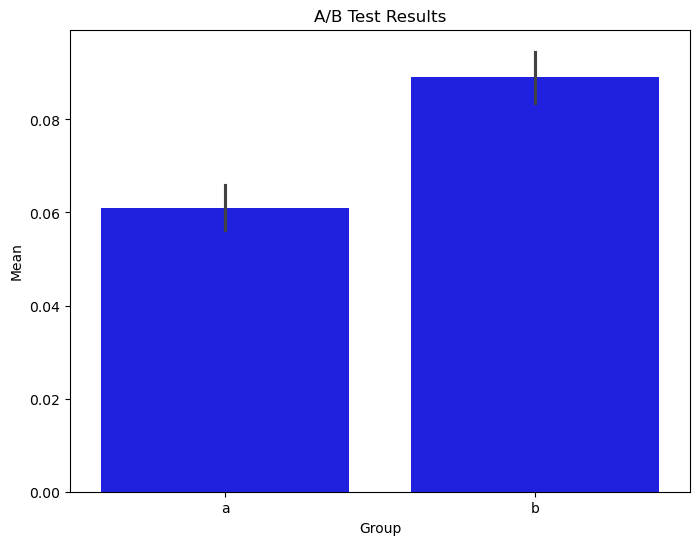

In [95]:
# Plotarea graficului 
plt.figure(figsize=(8, 6))
sns.barplot(x=df['test_group'],
            y=df['conversion'],
            errorbar=('ci', 95),color='blue') # Confidence Intervals

plt.title('A/B Test Results')
plt.xlabel('Group')
plt.ylabel('Mean')
           
plt.show()